In [350]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

In [351]:
k = 1000*(2*np.pi)**2
c = 10.0
m = 20.

In [352]:
ω0 = np.sqrt(k/m)
ζ = c/(2*np.sqrt(m*k))
ωn = ω0*np.sqrt(1-ζ**2)
fn = ωn/(2*np.pi)

In [353]:
#Zm = np.sqrt((2*ω0*ζ)**2 + 1/ω**2 * (ω0**2 - ω**2)**2)
#X0 = F0/(m*ω*Zm)
#ϕ = np.arctan(2*ω*ω0*ζ/(ω0**2 - ω**2))
   

In [354]:
fn, ζ

(7.070955865829286, 0.005626976975981912)

In [355]:
Minf = 0.5
pinf = 101325.
Tinf = 288.15
c = 1.0
γ = 1.4
α = np.deg2rad(1.5)

In [356]:
L = γ*pinf*Minf**2*c*np.pi*α
Δy = L/k

In [357]:
Δy

0.0738828125

In [358]:
b_data = np.genfromtxt('../ext_sm_driver.mov')

In [359]:
indexes = np.unique(b_data[:,0])

steps = b_data.shape[0] // len(indexes)

bmov = {}

for ii in indexes:
    bmov[int(ii)] = np.zeros((steps,12))

    for step in range(steps):
        for ii in indexes:
            bmov[int(ii)][step,:] = b_data[len(indexes)*step+int(ii)-1,1:]

In [360]:
t_data = np.genfromtxt('../ext_sm_driver.out',comments='#')[:,1:]

In [361]:
t_ext = t_data[:,1]

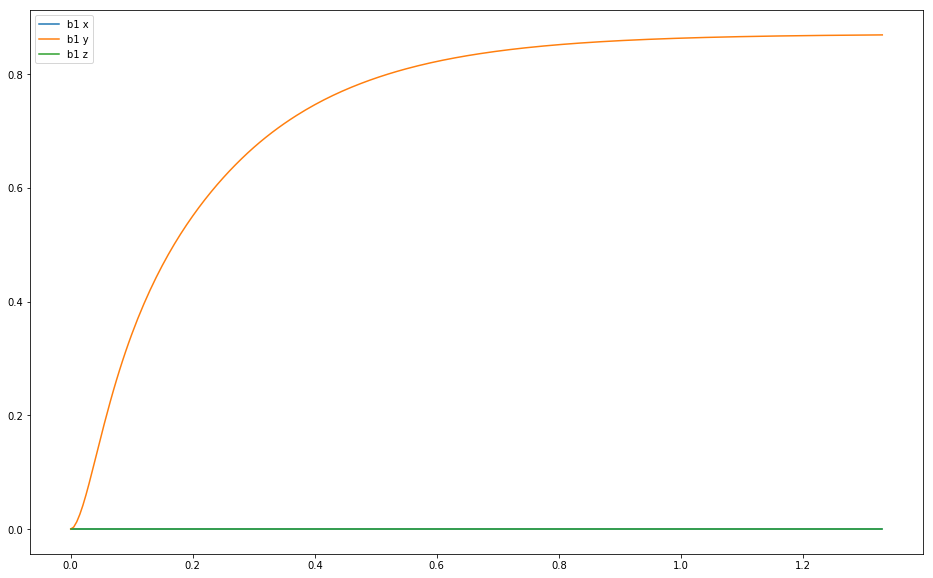

In [362]:
plt.figure(figsize=(16,10))
plt.plot(t_ext,bmov[1][:,0],label='b1 x')
plt.plot(t_ext,bmov[1][:,1],label='b1 y')
plt.plot(t_ext,bmov[1][:,2],label='b1 z')
plt.legend();

In [363]:
fd = np.genfromtxt("../Forces_Displacements.txt",comments="#")

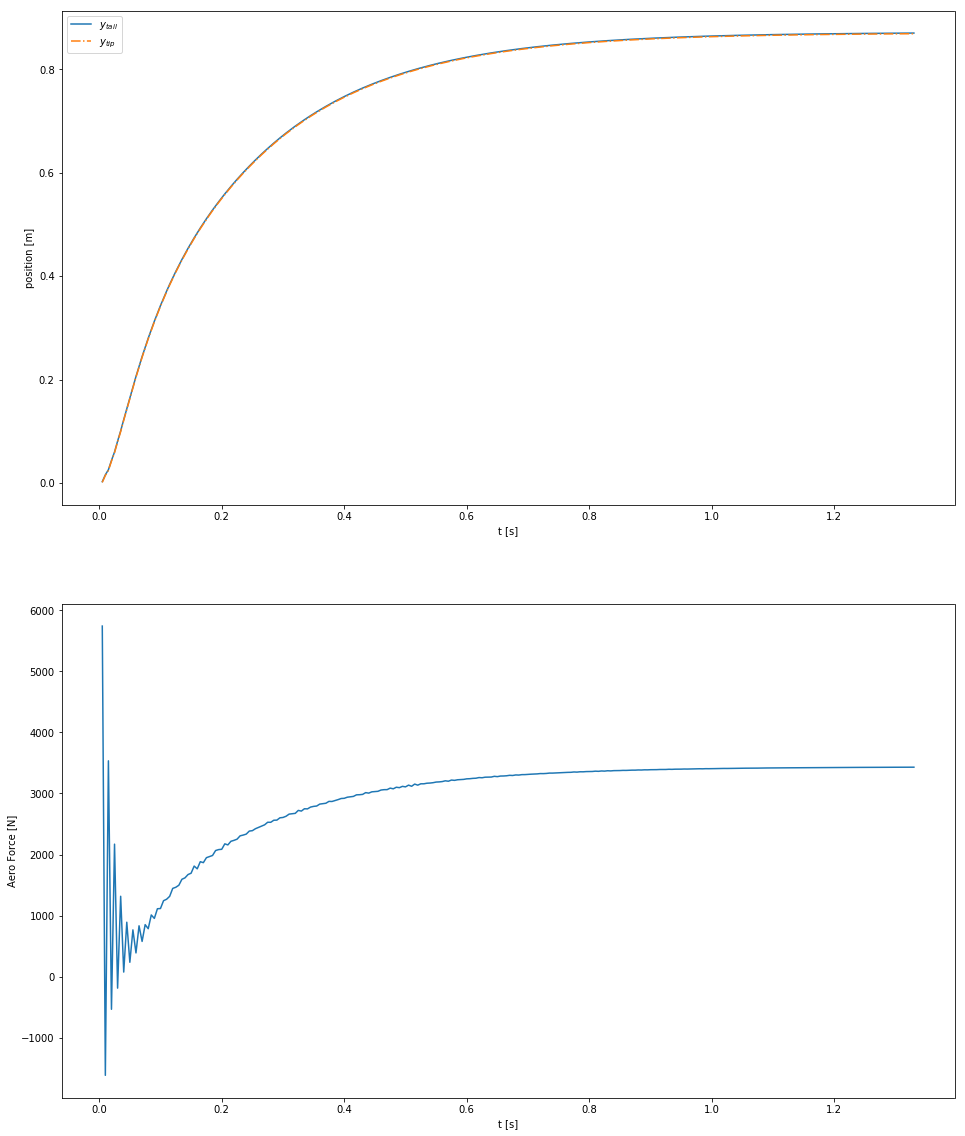

In [364]:
plt.figure(figsize=(16,20))
plt.subplot(2,1,1)
plt.plot(fd[:,0],fd[:,5],label=r'$y_{tail}$')
plt.plot(fd[:,0],fd[:,7],label=r'$y_{tip}$',ls='-.')
plt.legend()
plt.xlabel('t [s]')
plt.ylabel('position [m]')
plt.subplot(2,1,2)
plt.plot(fd[:,0],fd[:,12],label=r'$F_y$')
plt.xlabel('t [s]')
plt.ylabel('Aero Force [N]');

In [365]:
# Number of samplepoints
y = bmov[1][:,1]
N = len(y)
# sample spacing
T = 0.01
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

In [366]:
#plt.figure(figsize=(16,10))
#plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
#plt.xlim(0,20)
#plt.grid()
#plt.ylim(0,1e-4);